# 比较、掩码和布尔逻辑

这一节将会介绍如何用布尔掩码来查看和操作 `NumPy` 数组中的值。  
当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。  
例如你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常点。  
在 `NumPy` 中，布尔掩码通常是完成这类任务的最高效方式。

In [1]:
import numpy as np

np.random.seed(0)

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  img {width:30%; height: 30%;}
</style>

## 1. 示例：统计下雨天数

In [3]:
import pandas as pd

rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

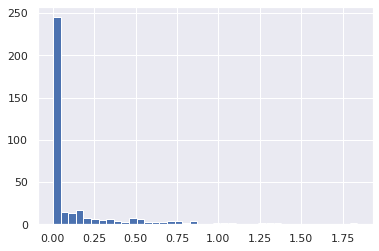

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40)

## 2. 和通用函数类似的比较操作

和算术运算符一样，比较运算操作在 `NumPy` 中也是借助通用函数来实现的。例如当你写 `x < 3` 时，`NumPy` 内部会使用 `np.less(x, 3)`。

In [5]:
x = np.array([1, 2, 3, 4, 5])
print(x <  3)
print(x >  3)
print(x <= 3)
print(x >= 3)
print(x != 3)
print(x == 3)
print((2 * x) == (x ** 2))

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]
[False  True False False False]


**比较运算符与其对应的通用函数：**

| 运算符 | 对应的通用函数
| -- | -- |
| == | np.equal |
| != | np.not_equal |
| < | np.less |
| <= | np.less_equal |
| > | np.greater |
| >= | np.greater_equal |

In [6]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
print(x)

x < 6

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 3. 操作布尔数组

In [7]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### 3.1. 统计记录的个数

`Python`中 `False` 会被解释成 0，`True` 会被解释成 1。

In [8]:
np.count_nonzero(x < 6)

8

In [9]:
np.sum(x < 6)

8

In [10]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [11]:
np.any(x > 8)

True

In [12]:
np.any(x < 0)

False

In [13]:
np.all(x < 10)

True

In [14]:
np.all(x == 6)

False

In [15]:
np.all(x < 8, axis=1)

array([ True, False,  True])

### 3.2. 布尔运算符

In [16]:
np.sum((inches > 0.5) & (inches < 1))

29

In [17]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

**逐位布尔运算符与其对应的通用函数**

| 运算符 | 对应通用函数 |
| -- | -- |
| & | np.bitwise_and |
| \| | np.bitwise_or |
| ^ | np.bitwise_xor |
| ~ | np.bitwise_not |

In [18]:
print("Number days without rain:       ", np.sum(inches == 0))
print("Number days with rain:          ", np.sum(inches != 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches: ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:        215
Number days with rain:           150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:  75


## 4. 将布尔数组作为掩码

在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据集。

In [19]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [20]:
x < 5  # 比较运算符可以得到一个同尺寸的布尔数组，即一个掩码数组

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [21]:
x[x < 5]  # 通过掩码选出对应的值

array([0, 3, 3, 3, 2, 4])

In [22]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码（6月21日是第172天）
days = np.arange(365)
summer = (days > 172) & (days < 172+90)

print("Median precip on rainy days in 2014 (inches):    ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):   ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):  ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):     0.19488188976377951
Median precip on summer days in 2014 (inches):    0.0
Maximum precip on summer days in 2014 (inches):   0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


## 5. 使用关键字 and/or 与使用逻辑操作运算符 &/|

人们经常困惑于关键字 `and` 和 `or`，以及逻辑操作运算符 `&` 和 `|` 的区别是什么，什么时候该选择哪一种？  
它们的区别是：`and` 和 `or` 判断**整个对象**是真或假，而 `&` 和 `|` 是指**每个对象中的比特位**。  
当你使用 `and` 或 `or` 时，就等于让 `Python` 将这个对象当作整个布尔实体。在 `Python` 中，所有非零的整数都会被当作是 `True`：

In [23]:
bool(42), bool(0)

(True, False)

In [24]:
bool(42 and 0)

False

In [25]:
bool(42 or 0)

True

当你对整数使用 `&` 和 `|` 时，表达式操作的是元素的比特，将 `and` 或 `or` 应用于组成该数字的每个比特：

In [26]:
bin(42)

'0b101010'

In [27]:
bin(59)

'0b111011'

In [28]:
bin(42 & 59)

'0b101010'

In [29]:
bin(42 | 59)

'0b111011'

请注意，`&` 和 `|` 运算时，对应的二进制比特位进行比较以得到最终结果。

当你在 `NumPy` 中有一个布尔数组时，该数组可以被当作是由比特字符组成的，其中 `1 = True`、`0 = False`。这样的数组可以用上面介绍的方式进行 `&` 和 `|` 的操作：

In [30]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

而用 `or` 来计算这两个数组时，`Python` 会计算整个数组对象的真或假，这会导致程序出错：

In [31]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

同样，对给定数组进行逻辑运算时，你也应该使用 `|` 或 `&`，而不是 `or` 或 `and`：

In [32]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

如果试图计算整个数组的真或假，程序也同样会给出 `ValueError` 的错误：

In [33]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

因此可以记住：`and` 和 `or` 对整个对象执行单个布尔运算，而 `&` 和 `|` 对一个对象的内容（单个比特或字节）执行多个布尔运算。对于 `NumPy` 布尔数组，后者是常用的操作。